In [3]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
from utility import plot_template
import seaborn as sns 

In [4]:
def convert_float(arr):
    temp = []
    i = 0 
    for a in arr:
        try:
            temp.append(float(a))
        except:
            temp.append(0)
    return np.asarray(temp)

In [5]:
def chk_nan(a):
    flag = 1
    try:
        float(a)
    except:
        flag=0
    return flag
chk_nan(' ')

0

In [6]:
agn = pd.read_csv('AGN_selected_col.csv')
agn=agn.dropna(how='any' , axis =0)
agn_hard_hm = agn['hard_hm'].to_numpy()
agn_hard_ms = agn['hard_ms'].to_numpy()
agn_hm_clean = []
agn_ms_clean = []
for i in range(len(agn_hard_hm)):
    if(chk_nan(agn_hard_hm[i]) and chk_nan(agn_hard_ms[i])):
        agn_hm_clean.append(agn_hard_hm[i])
        agn_ms_clean.append(agn_hard_ms[i])

print(len(agn_hm_clean))
print(len(agn_ms_clean))    
agn_hm_clean =  convert_float(agn_hm_clean)
agn_ms_clean =  convert_float(agn_ms_clean)

2850
2850


In [7]:
print(agn.shape)

(2916, 61)


In [8]:
x =  [1,2,4,63,23]
print(np.amax(x))

63


In [35]:
import scipy as sc 
#print(agn.iloc[:,[5]])
corr_mat = []
for i in range(5,61):
    corr_row = []
    for j in range(5,61):
        param_a = convert_float(agn.iloc[:,i])
        param_a = param_a/np.amax(param_a)
        param_b = convert_float(agn.iloc[:,j])
        param_b = param_b/np.amax(param_b)
        #corr = sc.stats.ttest_rel(param_a , param_b)
        corr = np.corrcoef(param_a , param_b)
        #corr_row.append(np.abs(corr[0]))
        corr_row.append(100*np.abs(corr[0,1]))
    corr_mat.append(corr_row)
corr_mat = np.asarray(corr_mat)
print(corr_mat.shape)

(56, 56)


In [30]:
import scipy as sc 
#print(agn.iloc[:,[5]])
corr_mat_t_test = []
for i in range(5,61):
    corr_row = []
    for j in range(5,61):
        param_a = convert_float(agn.iloc[:,i])
        param_a = param_a/np.amax(param_a)
        param_b = convert_float(agn.iloc[:,j])
        param_b = param_b/np.amax(param_b)
        corr = sc.stats.ttest_rel(param_a , param_b)
        #corr = np.corrcoef(param_a , param_b)
        corr_row.append(np.abs(corr[0]))
        #corr_row.append(corr[0,1])
    corr_mat_t_test.append(corr_row)
corr_mat_t_test = np.asarray(corr_mat_t_test)
print(corr_mat_t_test.shape)

(56, 56)


In [10]:
param_a = convert_float(agn.iloc[:,5])
param_b = convert_float(agn.iloc[:,5])
corr = np.correlate(param_a , param_a , mode='valid')
print(corr)

[1.05365328e-05]


In [11]:
corr_mat = np.reshape(np.asarray(corr_mat) , (56,56))
print(corr_mat.shape)

(56, 56)


In [12]:
print(corr_mat[18])

[ 9.23252519  5.12615509  4.33865168  8.84788445 11.24581485  4.29043696
  1.13246501  1.72266479  8.23736199  4.4769282   3.65842085  6.38262854
 10.830339    3.33581199  1.37342165  4.3908149   9.71095105  3.72313622
         nan  1.8425257   9.66729852  3.84166661 13.23961928  3.77674086
  9.6812164   3.7508926  13.39667403  3.36238165  9.72948715  3.77301672
 13.2309824  12.73349095 28.18554095  9.04437944  5.23989127  9.52750413
 14.07246473 10.71898089 11.10842759 15.16699981 23.7440146  11.1105179
  9.14309928  9.03024529 10.82706421  2.78175082 17.42263362 28.5702296
 16.15462893 37.21673762 27.85539232 13.72814111 96.6707356  75.08728688
 79.56046581 74.34153647]


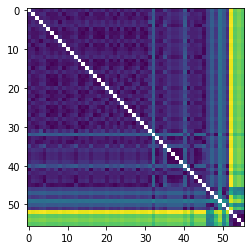

In [13]:
plt.imshow(corr_mat , interpolation=None)
plt.show()

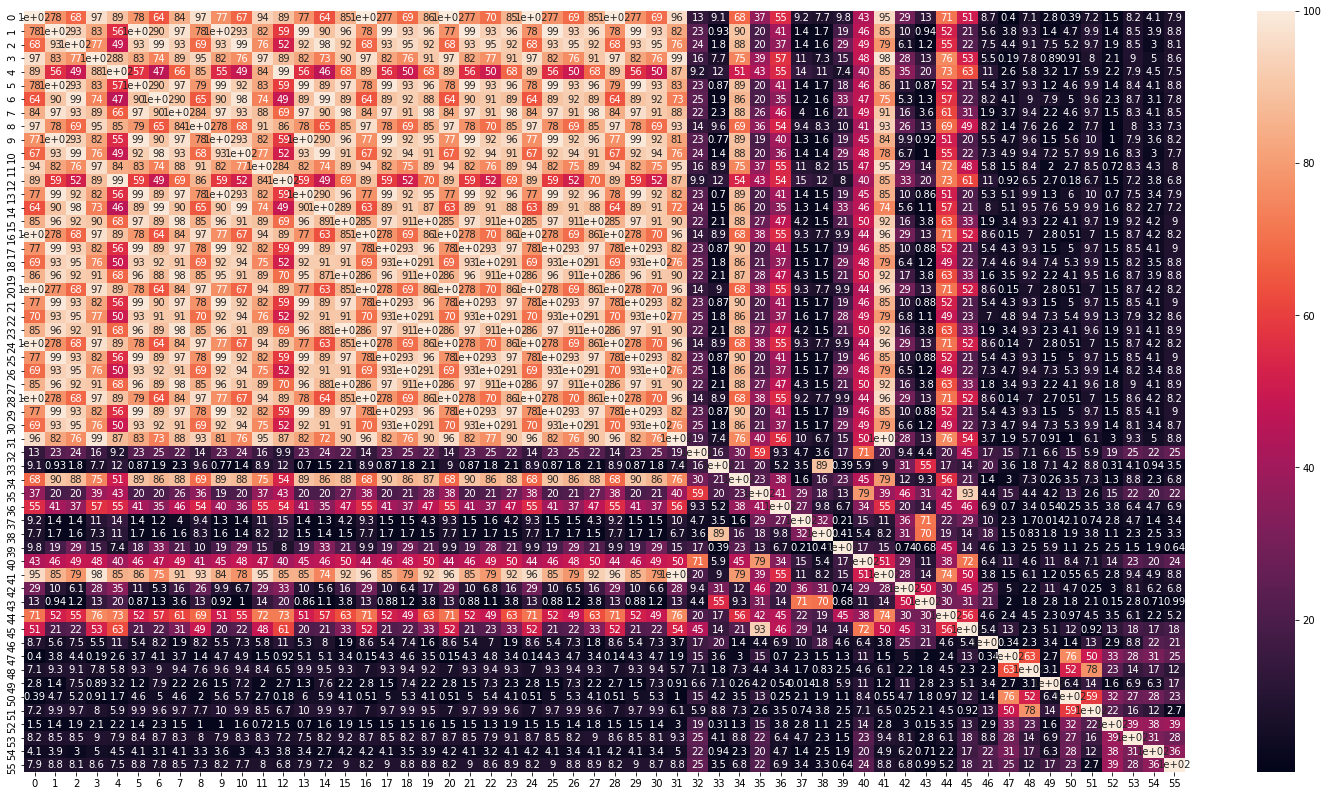

In [36]:
import seaborn as sns 
plt.figure(figsize = (26,14))
sns.heatmap(corr_mat, annot=True)
#plt.xticks(param_name)
plt.show()

In [24]:
param_name = list(agn)[5:]
i = 0 
for p in param_name:
    print(str(i) +':' + p)
    i+=1

0:photflux_aper_h
1:photflux_aper_m
2:photflux_aper_s
3:flux_aper_b
4:flux_aper_h
5:flux_aper_m
6:flux_aper_s
7:photflux_aper_avg_b
8:photflux_aper_avg_h
9:photflux_aper_avg_m
10:photflux_aper_avg_s
11:flux_aper_avg_b
12:flux_aper_avg_h
13:flux_aper_avg_m
14:flux_aper_avg_s
15:flux_powlaw_aper_b
16:flux_powlaw_aper_h
17:flux_powlaw_aper_m
18:flux_powlaw_aper_s
19:flux_bb_aper_b
20:flux_bb_aper_h
21:flux_bb_aper_m
22:flux_bb_aper_s
23:flux_brems_aper_b
24:flux_brems_aper_h
25:flux_brems_aper_m
26:flux_brems_aper_s
27:flux_apec_aper_b
28:flux_apec_aper_h
29:flux_apec_aper_m
30:flux_apec_aper_s
31:flux_powlaw
32:powlaw_gamma
33:powlaw_nh
34:powlaw_ampl
35:powlaw_stat
36:flux_bb
37:bb_kt
38:bb_nh
39:bb_ampl
40:bb_stat
41:flux_brems
42:brems_kt
43:brems_nh
44:brems_norm
45:brems_stat
46:hard_hm
47:var_inter_hard_prob_hs
48:var_inter_hard_sigma_hs
49:hard_ms
50:var_inter_hard_prob_ms
51:var_inter_hard_sigma_ms
52:ks_intra_prob_b
53:ks_intra_prob_h
54:ks_intra_prob_m
55:ks_intra_prob_s


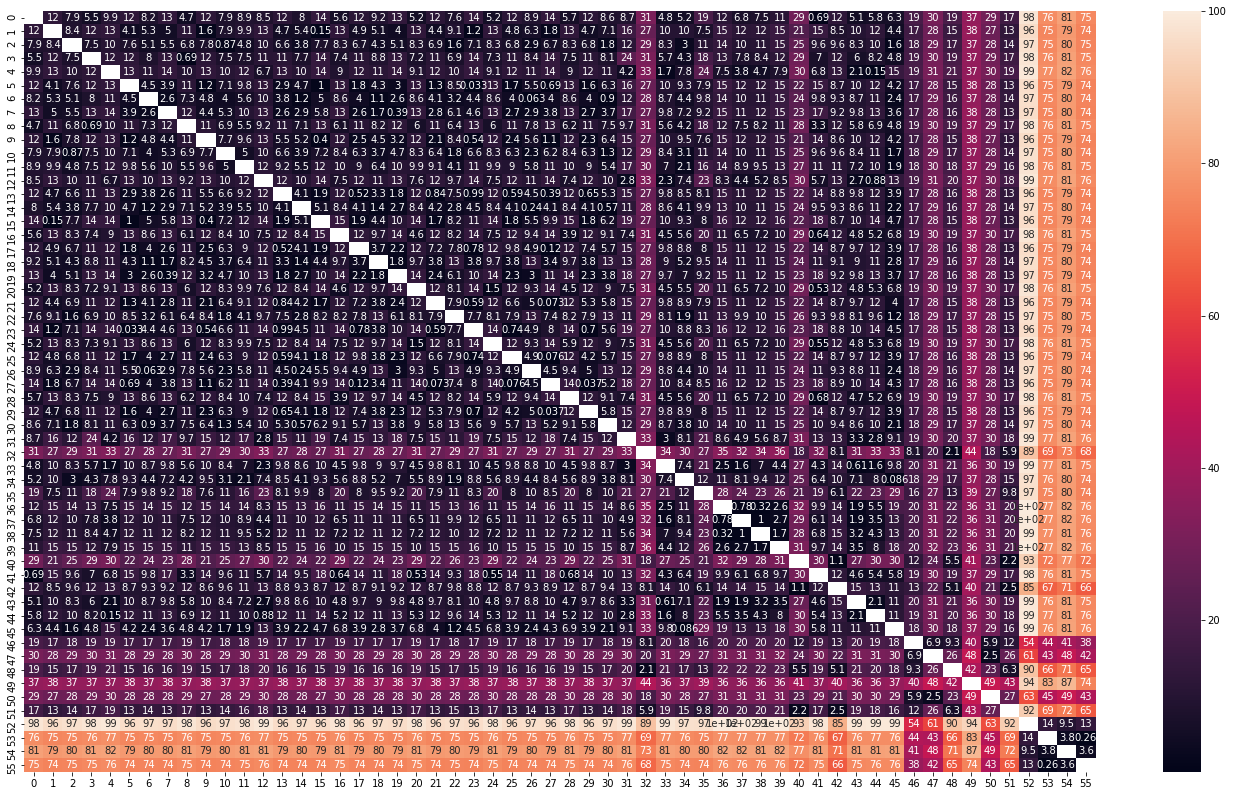

In [37]:
import seaborn as sns 
plt.figure(figsize = (24,14))
sns.heatmap(corr_mat_t_test, annot=True)
#plt.xticks(param_name)
plt.show()